# ARE 212 Assignment 1

## Aline Abayo, Eleanor Adachi, Anna Cheyette, Karla Neri and Stephen Stack

## 1. Admin

We created a fork of the main GitHub repository. Our code can be found here: https://github.com/eleanor-adachi/ARE212_Materials

## 2. Exercises

### (1)

**From ARE210, recall (Section 9 in Mahajan’s “Handout 1”) the rule for computing the distribution of certain transformations
of random variables (the “inverse Jacobian rule”). Let** $(x, y)$ **be independently distributed continuous random variables possessing densities** $f_x$ **and** $f_y$. **Let** $z = x+y$. **Use the rule to obtain an expression for the distribution of** $z$.

Given two random variables $x$ and $y$ where $y=f(x)$ and $x$ has probability density function $p_x(x)$

Then $p_y(y) = p_x(x)|\frac{dx}{dy}| = p_x(x)|\frac{df^{-1}(y)}{dy}|$

For $z = x + y$ where $x$ has probability density function $f_x(x)$ and $y$ has probability density function $f_y(y)$,

$f_z(z) = f_x(x)|\frac{\partial x}{\partial z}| \cdot f_y(y)|\frac{\partial y}{\partial z}|$

$x = z - y$ and $y = z - x$, so $\frac{\partial x}{\partial z} = 1$ and $\frac{\partial y}{\partial z} = 1$

Therefore, $z$ has a continuous distribution with probability density $f_z$ given by

$f_z(z) = \int_{-\infty}^{\infty} f_x(x) f_y(z-x) \,dx$

### (2)

**We've discussed ways to program a convolution of random variables in a Jupyter notebook. As in the notebook, consider a discrete random variable** $s$ **and a continuous random variable** $x$. **Prove that the convolution of** $s$ **and** $x$ **(or, informally,** $x+s$**) has a continuous distribution, as suggested by the figure at the end of the notebook, or establish that the figure is wrong or misleading.**

*Definition*: a convolution occurs when two mathematical functions are combined. In this context, we are combining two functions that give the probability distributions of random variables, and creating a new probability distribution which is a sum of those two.

In this case, we are interested in convolutions of a continuous and a random variable, and we want to prove that the convolved distribution is continuous. As suggested in the lecture, a proof of this is that it has a density, rather than being a collection of mass points.

First, let's set up a similar pair of distributions as was done in lecture.

In [27]:
""" First, a continuous random variable x"""
from   scipy.stats import distributions as iid
from   scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Let's customize this distribution
mean  = 2
sigma = 2

x = iid.norm(loc=mean, scale=sigma)

# Produce some characteristics
print("E(x) = %6.4f" % x.mean())
print()
print("Some (central) moments of x:")
print([(m,x.moment(m)) for m in [1,2,3,4]])
print()
print(x.cdf(0), x.pdf(0))

# Produce some realisations
N = 15
print(x.rvs(N))

E(x) = 2.0000

Some (central) moments of x:
[(1, 2.0), (2, 8.0), (3, 32.0), (4, 160.0)]

0.15865525393145707 0.12098536225957168
[0.63195421 4.71245815 0.83518377 0.45549846 1.45331341 2.23733351
 1.55774542 1.10926418 1.84474131 1.25382478 3.15417444 4.99907807
 3.36888293 0.72711908 0.18051045]


[7.43359757e-07 1.22553052e-06 1.99994519e-06 3.23058320e-06
 5.16550329e-06 8.17547945e-06 1.28080406e-05 1.98619112e-05
 3.04879520e-05 4.63238177e-05 6.96705616e-05 1.03720154e-04
 1.52843113e-04 2.22944862e-04 3.21897749e-04 4.60052385e-04
 6.50826921e-04 9.11365548e-04 1.26324789e-03 1.73321896e-03
 2.35389538e-03 3.16438821e-03 4.21076724e-03 5.54627742e-03
 7.23120740e-03 9.33230497e-03 1.19216373e-02 1.50748070e-02
 1.88684616e-02 2.33770712e-02 2.86690026e-02 3.48019792e-02
 4.18180886e-02 4.97385694e-02 5.85586798e-02 6.82430046e-02
 7.87215938e-02 8.98873326e-02 1.01594918e-01 1.13661753e-01
 1.25870973e-01 1.37976686e-01 1.49711342e-01 1.60795012e-01
 1.70946147e-01 1.79893279e-01 1.87386990e-01 1.93211427e-01
 1.97194617e-01 1.99216901e-01 1.99216901e-01 1.97194617e-01
 1.93211427e-01 1.87386990e-01 1.79893279e-01 1.70946147e-01
 1.60795012e-01 1.49711342e-01 1.37976686e-01 1.25870973e-01
 1.13661753e-01 1.01594918e-01 8.98873326e-02 7.87215938e-02
 6.82430046e-02 5.855867

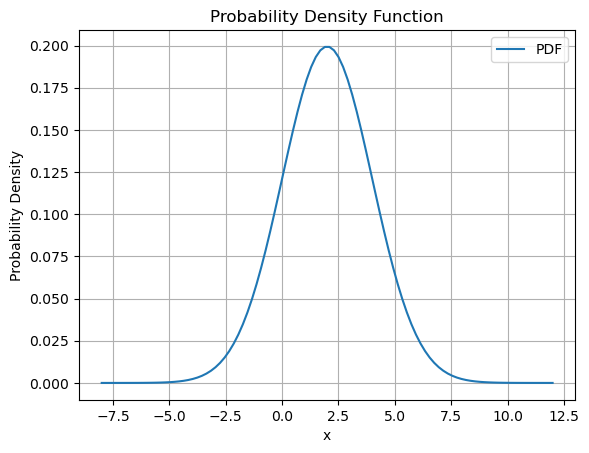

In [28]:
""" Let's take a look at the pdf for this distribution """
# x-values
x_values = np.linspace(mean - 5*sigma, mean + 5*sigma, 100)

# Get PDF
pdf_values = x.pdf(x_values)
print(pdf_values)

# Plot
plt.plot(x_values, pdf_values, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
""" Next, do a discrete variable"""
omega =(-5, -2, 0, 3, 10)
Pr    =(1/12, 3/12, 1/12, 2/12, 5/12)

s = iid.rv_discrete(values=(omega, Pr))

# Produce some characteristics 
print("E(s) = %6.4f" % s.mean())
print()
print("Some moments of s:")
print([(m,s.moment(m)) for m in [1,2,3,4]])
print()
print("95%% confidence interval: (%f,%f)" % s.interval(0.95))
print()
# Note! Not pdf, but pmf for discrete rv.
print(s.cdf(0),s.pmf(0))

# Produce some realisations
N=20
realizations = [s.rvs() for _ in range(N)] # N realizations; no longer random
print(realizations)

E(s) = 3.7500

Some moments of s:
[(1, 3.7500000000000004), (2, 46.25000000000001), (3, 408.75), (4, 4236.25)]

95% confidence interval: (-5.000000,10.000000)

0.41666666666666663 0.08333333333333333
[-2, -5, 10, -2, 10, 10, 3, -2, 10, -2, -5, 10, -2, 10, 10, 10, -2, 10, 3, 10]


[0.08333333 0.25       0.08333333 0.16666667 0.41666667]


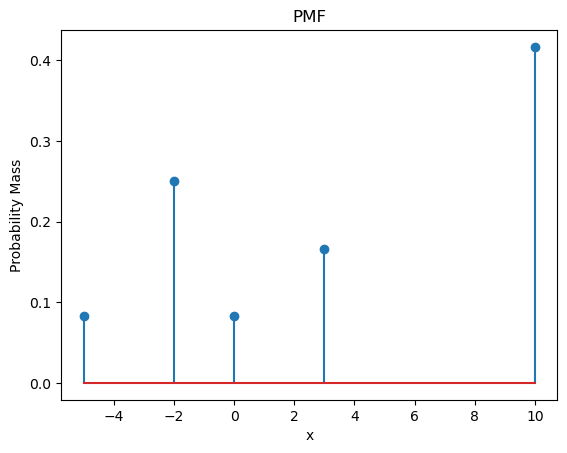

In [30]:
""" Next do the probability mass function for this """
# PMF
pmf_values = s.pmf(omega)
print(pmf_values)

# Plot this
plt.stem(omega, pmf_values, markerfmt='o', linefmt='-')
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.title('PMF')
plt.show()


Next, define the convolved distribution

In [31]:
from scipy.stats import distributions as iid

# Code to convolve a random variable with a pmf and another having a cdf
# Exploits =scipy.stats= base rv_continuous class.

class ConvolvedContinuousAndDiscrete(iid.rv_continuous):

    """Convolve (add) a continuous rv x and a discrete rv s,
       returning the resulting cdf."""

    def __init__(self,f,s):
        self.continuous_rv = f
        self.discrete_rv = s
        super(ConvolvedContinuousAndDiscrete, self).__init__(name="ConvolvedContinuousAndDiscrete")
        
    def _cdf(self,z):
        F=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            F = F + x.cdf(z-s.xk[k])*s.pk[k]
        return F

    def _pdf(self,z):
        f=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            f = f + x.pdf(z-s.xk[k])*s.pk[k]
        return f


# Create new convolved rv:
y = ConvolvedContinuousAndDiscrete(x,s)

In [32]:
import plotly.graph_objects as go
import numpy as np

X = np.linspace(-4,4,100).tolist()

fig = go.Figure(data=go.Scatter(x=X, y=[y.pdf(z) for z in X]))
fig.show()

There are two ways we can prove that this is continuous. The first is by thinking about the convolution operation itself. When we convolve a continuous and weighted distribution, for each given value in the continuous function, we shift the discrete function and then multiply the product of the two functions (in this case, taking a weighted average across the different possible values for the discrete function). Since we know that the product of multiplying a continuous and discrete number is a continuous number, it follows that each each value at th

In [33]:
input = 0
for z in X:
   for k in range(len(s.xk)):
      a = z-s.xk[k]
      b = s.pk[k]
      input = input + (a*b)

   print(input)
    


-7.75
-15.419191919191919
-23.007575757575758
-30.51515151515152
-37.9419191919192
-45.28787878787879
-52.5530303030303
-59.737373737373744
-66.84090909090911
-73.86363636363637
-80.80555555555556
-87.66666666666666
-94.44696969696967
-101.14646464646464
-107.76515151515152
-114.30303030303031
-120.76010101010102
-127.13636363636365
-133.43181818181822
-139.64646464646466
-145.78030303030303
-151.83333333333331
-157.80555555555551
-163.69696969696963
-169.50757575757567
-175.23737373737367
-180.88636363636363
-186.4545454545455
-191.94191919191928
-197.348484848485
-202.6742424242426
-207.91919191919214
-213.0833333333336
-218.16666666666697
-223.16919191919226
-228.09090909090946
-232.93181818181858
-237.69191919191962
-242.37121212121258
-246.96969696969745
-251.48737373737424
-255.92424242424295
-260.28030303030357
-264.55555555555605
-268.75000000000045
-272.8636363636368
-276.896464646465
-280.84848484848516
-284.7196969696972
-288.5101010101012
-292.2196969696972
-295.84848484848

### (3)

Let $A$ be an $m \times n$ matrix. A matrix  $\mathrm{A}^{-}$ is a generalized inverse of $A$ if $\mathrm{AA}^{-}A=A$. Such a generalized inverse can be shown to always exist. If A is a matrix of zeros, what can we say about $\mathrm{A}^{-}$.

In [34]:
%reset -f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

seed_value = 42

# Define a random matrix A (m x n)
m = 3  # number of rows
n = 2  # number of columns
A = np.random.rand(m, n)

# Calculate the generalized inverse A-
A_inv = np.linalg.pinv(A)

# Calculate AA-A
result = np.dot(np.dot(A, A_inv), A)

# Check if AA-A = A (within a small tolerance due to floating-point precision)
tolerance = 1e-10
is_identity = np.allclose(result, A, atol=tolerance)

print("Matrix A:")
print(A)

print("\nGeneralized Inverse A-:")
print(A_inv)

print("\nAA-A:")
print(result)

Matrix A:
[[0.85623668 0.10756883]
 [0.41362675 0.74902667]
 [0.89122633 0.49505689]]

Generalized Inverse A-:
[[ 0.89889237 -0.43260894  0.45922567]
 [-0.79530296  1.36209019  0.13192005]]

AA-A:
[[0.85623668 0.10756883]
 [0.41362675 0.74902667]
 [0.89122633 0.49505689]]


Now, if matrix $A$ is a matrix of zeros, then it is a zero matrix, denoted as 0. In this case, $\mathrm{A}^{-}$, the generalized inverse of A, would be the Moore-Penrose pseudoinverse of the zero matrix. The Moore-Penrose pseudoinverse of a zero matrix is the zero matrix itself. This can be understood from the properties of the Moore-Penrose pseudoinverse:

If A is a zero matrix, then $\mathrm{A}^{+}=\mathrm{A}^{-}=\mathrm{A}^{´}=0$

So, in summary, if A is a matrix of zeros, its generalized inverse A− is also a zero matrix.

In [35]:
import sympy as sp
import pandas as pd
A = np.zeros((m, n))# Calculate the generalized inverse A-
A_inv = np.linalg.pinv(A)

# Calculate AA-A
result = np.dot(np.dot(A, A_inv), A)

# Check if AA-A = A (within a small tolerance due to floating-point precision)
tolerance = 1e-10
is_identity = np.allclose(result, A, atol=tolerance)

print("Matrix A:")
print(A)

print("\nGeneralized Inverse A-:")
print(A_inv)

print("\nAA-A:")
print(result)

Matrix A:
[[0. 0.]
 [0. 0.]
 [0. 0.]]

Generalized Inverse A-:
[[0. 0. 0.]
 [0. 0. 0.]]

AA-A:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


### (4)

Econometricians spend a great deal of time writing down linear regressions relating an object “Why” to an object “Ex”, but sometimes use quite distinct notations to express this regression. Following our discussion in class, suggest a notation for
each of the three following cases:

(a) “Why” is a scalar random variable, while “Ex” is a vector
random variable;

$ y= \beta X + \upsilon $

(b) “Why” is a single realization of a scalar random variable,
while “Ex” is similarly a single realization;

$ y= \beta x + \upsilon $

(c) “Why” is a vector of N realizations, while “Ex” is similarly
a matrix of realizations.

$ Y= \beta X + \upsilon $

### (5)

**Moore-Penrose Inverse**

---

A matrix $A^+$ is a "Moore-Penrose" generalized inverse if:

- $AA^+A = A$;
- $A^+AA^+ = A^+$;
- $A^+A$ is symmetric; and
- $AA^+$ is symmetric.

**Full Rank Factorization**

---

Let $A$ be an $n\times m$ matrix of rank $r$. If $A = LR$, where $L$ is an $n\times r$ full column rank matrix, and $R$ is a $r\times m$ full row rank matrix, then $LR$ is a full rank factorization of $A$.

**Fact**

---

Provided only that $r>0$, the Moore-Penrose inverse $A^+ = R^{\top}(L^{\top}AR^{\top})^{-1}L^{\top}$ exists and is unique.

---

#### 1. If $A$ is a matrix of zeros, what is $A^+$?

For a matrix $A$ consisting entirely of zeros, its Moore-Penrose inverse, $A^+$, is also a matrix consisting entirely of zeros. This conclusion follows directly from the properties of the Moore-Penrose inverse:

- $AA^+A = A$; multiplying $A^+$, which is a zero matrix, by $A$ from both sides will result in a zero matrix, satisfying this property.
- $A^+AA^+ = A^+$; similarly, since $A$ is a zero matrix, $A^+$ remains unchanged and thus must also be a zero matrix to satisfy this property.
- $A^+A$ is symmetric; a zero matrix multiplied by another zero matrix is still a zero matrix, which is inherently symmetric.
- $AA^+$ is symmetric; likewise, this multiplication results in a zero matrix, which is symmetric.

Hence, when $A$ is a matrix of zeros, $A^+$ is also a matrix of zeros.


#### 2. Show  that if $X$ has full column rank, then $X^+ = (X^TX)^{-1}X^T$ (this is sometimes called the "left inverse"), and $X^+ X = I$.

Given a matrix $X$ with full column rank, it means that all columns of $X$ are linearly independent. This implies that the matrix $X^TX$ is invertible. The Moore-Penrose inverse of $X$, $X^+$, satisfies the property that $XX^+X = X$.

For matrices with full column rank, the Moore-Penrose inverse can be specifically expressed as $X^+ = (X^TX)^{-1}X^T$. This expression is sometimes referred to as the "left inverse" because when it is multiplied by $X$ from the left, it results in the identity matrix, $I$.

*Proof:*

1. **Start with the expression for $X^+$**: 

   We have $X^+ = (X^TX)^{-1}X^T$.

2. **Show that multiplying by $X$ yields $I$**:

   Calculate $X^+X = [(X^TX)^{-1}X^T]X = (X^TX)^{-1}(X^TX) = I$.
   
   Here, the product $(X^TX)$ is invertible because $X$ has full column rank, ensuring that $X^TX$ is a full rank square matrix and thus invertible. Multiplying this invertible matrix by its inverse yields the identity matrix, $I$.

This demonstrates that when $X$ has full column rank, its Moore-Penrose inverse $X^+$, when multiplied by $X$, yields the identity matrix, confirming that $X^+X = I$.

#### (3.) Use the result of (2) to solve for $b$ in the (matrix) form of theregression $y = Xb + u$ if $X^Tu = 0$.

Given the regression equation $y = Xb + u$ where $X$ has full column rank and it's given that $X^Tu = 0$, we aim to solve for the coefficient vector $b$. We leverage the property of the Moore-Penrose inverse that if $X$ has full column rank, then $X^+ = (X^TX)^{-1}X^T$ and $X^+X = I$.

**Starting from the regression equation**: 

   $$y = Xb + u$$

**Apply the Moore-Penrose inverse of $X$ to both sides**:

   Since we know $X^+X = I$, multiplying both sides by $X^+$ yields:

   $$X^+y = X^+Xb + X^+u$$

**Given that $X^Tu = 0$**:

   This simplifies to:

   $$X^+y = X^+Xb + 0$$

   Which further simplifies to:

   $$X^+y = b$$

   Because $X^+X = I$.

**Thus, the solution for $b$ is**:

   $$b = X^+y$$

   Where $X^+ = (X^TX)^{-1}X^T$ is the Moore-Penrose inverse of $X$.

This method shows how to isolate the coefficient vector $b$ in the presence of a noise vector $u$ that is orthogonal to the column space of $X$ ($X^Tu = 0$). 

## 5. Simultaneous Equations

**When we defined the general weighted regression, we didn’t assume anything about the dimension of the different objects except that they were 'conformable.'**

**So: consider**

(2) $y = X\beta + u$; **with** $E[T'u] = 0$, **and where** $y = [y_1, y_2, ... , y_k]$, **so that if you had a sample of** $N$ **observations realizations of** $y$ **would be an** $N \times k$ **matrix.**

### (1) What does our assumption of conformability then imply about the dimensions of $X, \beta, T$, and $u$?

Our assumption of conformability implies that $X$ is $N \times \ell$, $\beta$ is $\ell \times k$, $T$ is $N \times \ell$, and $u$ is $N \times k$.

### (2) Could you use the estimator we developed in `weighted_regression.ipynb` to estimate this system of simultaneous equations?

No, because that estimator assumes that $y$ only has one column.

### (3) Extend the code in `weighted_regression.ipynb` to actually estimate $\beta$ in the case with $k = 3$.

To construct a sample of observables $(y,X,T)$:

In [36]:
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal

k = 3 # number of columns in y
l = 4 # number of columns in X
N = 100 # sample size

mu = [0]*l
Sigma = [
    [1,0.5,0,0.2],
    [0.5,2,0,0],
    [0,0,3,0],
    [0.2,0,0,1.5]]
T = multivariate_normal(mu,Sigma)

u = multivariate_normal([0]*k, 0.5)

beta = np.array(
    [[0.5, 0.7, 0.9],
     [1, 1.2, 1.4],
     [2, 2.2, 2.4],
     [3, 3.2, 3.4]])

D = np.random.random(size=(N, l)) # Generate random matrix

# Now: Transform rvs into a sample
T = T.rvs(N)

u = u.rvs(N) # Replace u with a sample

X = (T**3)*D  # element-wise multiplication

y = X@beta + u # Note use of @ operator for matrix multiplication

In the classical case we were trying to solve a linear system that took the form $Ab=0$, with $A$ a square matrix.  In the present case we're also trying to solve a linear system, but with a matrix $A$ that may have more rows than columns.  Provided the rows are linearly independent, this implies that we have an **overidentified** system of equations.  We'll return to the implications of this later, but for now this also calls for a different numerical approach, using `np.linalg.lstsq` instead of `np.linalg.solve`.

In addition, since $y$ is $N \times k$, we need to use the full formula to solve for $\hat{\beta}$:

$\hat{\beta} = (X'TT'X)^{-1} (X'TT'y)$

In [37]:
from scipy.linalg import inv, sqrtm

b = np.linalg.lstsq((X.T@T)@(T.T@X), (X.T@T)@(T.T@y), rcond=None)[0] # lstsq returns several results

print(b)

[[0.51585363 0.69097222 0.97919749]
 [1.01474044 1.22058453 1.40443073]
 [2.00227834 2.21436167 2.40539772]
 [3.00178606 3.21276326 3.38446417]]


### (4) What additional assumptions are necessary to estimate the distribution of the estimator of $\beta$?

We must make an assumption about homoskedasticity or heteroskedasticity of $u$ in order to estimate the variance-covariance matrix and standard errors for our estimate of $\beta$.

## 7. Food expenditures in India

The NSS surveys in India pioneered (in considerable part due to Mahalanobis) a wide variety of methodological innovations in sampling, questionnaire design, and have been among the most ambitious regularly collected data on household behavior and characteristics until recently. The most recently publicly released data on household expenditures was the “68th round”, collected in 2011–12. (More recent data has been collected, but suppressed for political reasons.) Data on householdlevel total food (and a few other non-durable) expenditures from the 68th round is available here, in the file total_expenditures.parquet. (You can use the pandas.read_parquet method to read these files–you may need to install some additional dependencies such as pyarrow.)

### 1) Use these data to produce a figure describing the distribution of non-durable expenditures across households, measured in INR, using a Gaussian kernel and some bandwidth h. What are the strengths and weaknesses of your figure in terms of what it conveys about the underlying distribution? Can weaknesses be addressed by choosing a different bandwidth or kernel? (Nothing formal required here—I encourage you to simply play around.)

           total_value
j                     
410001101         7813
410001102         3573
410001103         9359
410001201         5671
410001202         6169
...                ...
799981301         3842
799982101         2736
799982201         3378
799982202         3221
799982301         3777

[101660 rows x 1 columns]


Text(0.5, 1.0, 'Food Expenditures in India (INR)')

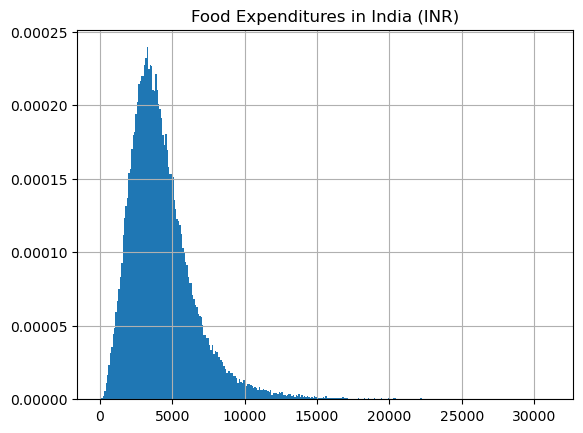

In [38]:
data1 = pd.read_parquet("../../total_expenditures.parquet")

print(data1)

data = pd.Series(data1["total_value"]) #no filter, it has some outliers
# Filter outliers
S = data[abs(data- data.mean()) <= 10*data.std()] ##notice 10 times from STD, only extreme outliers

# Define the Gaussian kernel
k = lambda u: np.exp(-(u**2)/2)/np.sqrt(2*np.pi) 
def kernel_estimator(X,h):
    return lambda x: k((X-x)/h).mean()/h

# Plot the probability density function (PDF) using a custom kernel function.
def plot_pdf(x, npts=100, ax=None, kernel_func=None, bandwidth=None):
    """
    Plot the probability density function (PDF) using a custom kernel function.
    
    Parameters:
    - x: Pandas Series or array-like object containing the data.
    - npts: Number of points for plotting.
    - ax: Matplotlib Axes object for plotting.
    - kernel_func: Custom kernel function.
    - bandwidth: Bandwidth parameter for the kernel function.
    """
    
    if ax is None:
        fig,ax = plt.subplots()

    # Calculate the kernel density estimate (KDE) using the custom kernel function
    if kernel_func is None:
        kde = x.plot.kde(ax=ax)
    else:
        kde_values = [kernel_func(x_i) for x_i in np.linspace(x.min(), x.max(), npts)]
        ax.plot(np.linspace(x.min(), x.max(), npts), kde_values, label=f'Custom KDE (Bandwidth={bandwidth})')
    
    # Set the x-axis limits based on the data range
    ax.set_xlim(x.min(), x.max() )
    
    # Add legend if using custom kernel function
    if kernel_func is not None:
        ax.legend()
    
    return ax

#Histogram
S.hist(bins=int(np.sqrt(len(S))),density=True)
plt.title('Food Expenditures in India (INR)')

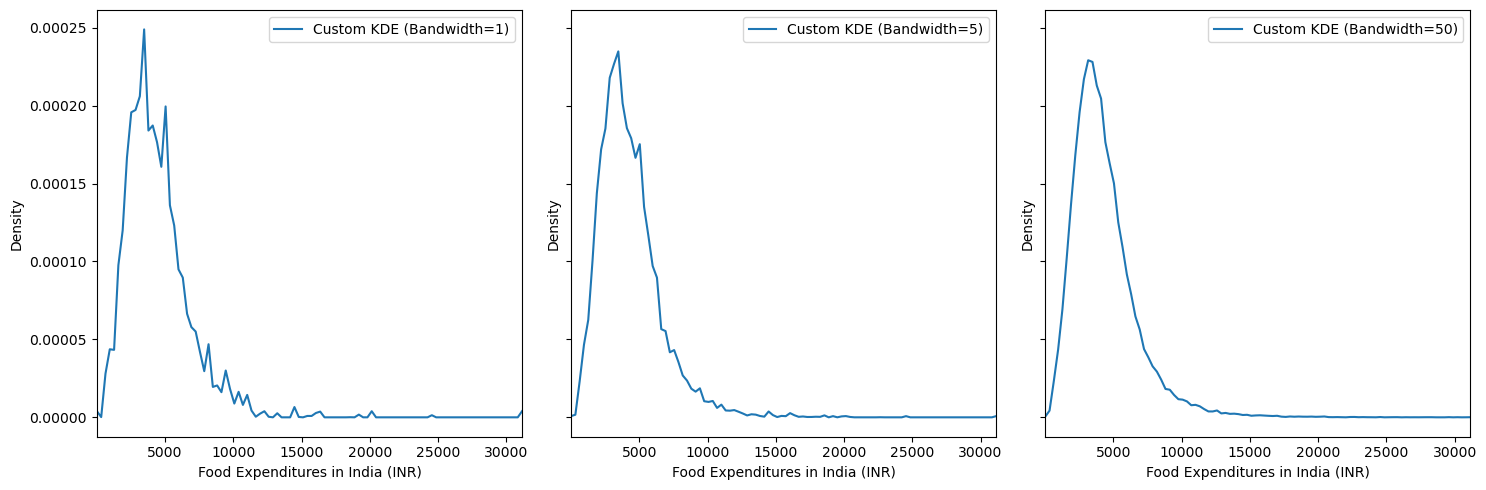

In [39]:
bandwidths = [1,5,50]
fig, axes = plt.subplots(nrows=1,ncols=len(bandwidths), figsize=(15, 5), sharey=True)

for i, bandwidth in enumerate(bandwidths):
    kernel = kernel_estimator(S, bandwidth)
    ax = axes[i] if len(bandwidths) > 1 else axes
    plot_pdf(S, ax=ax, kernel_func=kernel, bandwidth=bandwidth)
    ax.set_ylabel('Density')
    ax.set_xlabel('Food Expenditures in India (INR)')


plt.tight_layout()
plt.show()

According to our lectures, Hansen (Probability, &sect; 17.4) develops an expression for the bias of
the  kernel density estimator:
$$\mbox{Bias}(x) = \int k(u)\left(f(x+hu)-f(x)\right)du.$$
Thus, bias depends only on the kernel, the bandwidth, and the density $f$.

We see that a greater bandwidth gives us more precision but also more volatility and variance.

### 2) Once you’ve arrived at some favorite kernel & bandwidth (say $\mathrm{f}^{h}(x)$ describing the density of expenditures, can you use the “inverse Jacobian” rule to describe instead the density of log expenditures? Write code to produce this figure

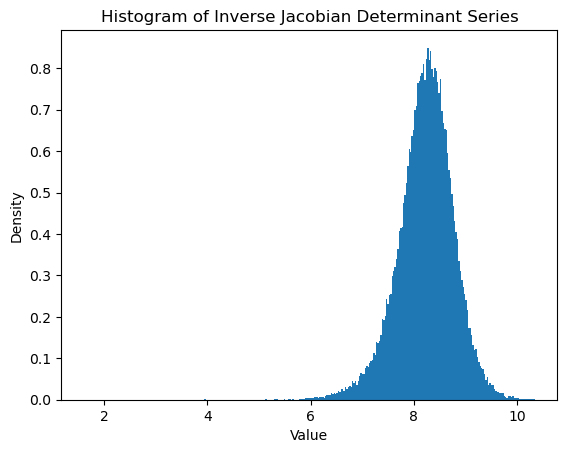

In [40]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data_series' is your data series
data_series = S
data_series = np.log(data_series)

# Define the variable and the logarithmic transformation function
x = sp.Symbol('x')
log_y = sp.log(x)  # Logarithmic transformation function

# Compute the Jacobian matrix
J = sp.Matrix([[sp.diff(log_y, x)]])

# Compute the determinant of the Jacobian matrix
det_J = J.det()

# Compute the inverse Jacobian determinant
inv_det_J = 1 / det_J

# Evaluate the inverse Jacobian determinant for each value in the data series
inv_det_series = []
for val in data_series:
    try:
        inv_det_series.append(float(inv_det_J.subs(x, val)))
    except (sp.ZeroDivisionError, ValueError, TypeError):
        pass

# Plot histogram of the inverse Jacobian determinant series
plt.hist(inv_det_series, bins=int(np.sqrt(len(inv_det_series))), density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Inverse Jacobian Determinant Series')
plt.show()

### 3) Instead of the route you’ve taken in (2), choose some kernel & bandwidth to estimate the density of log expenditures directly. How do the approaches of (2) and (3) compare?

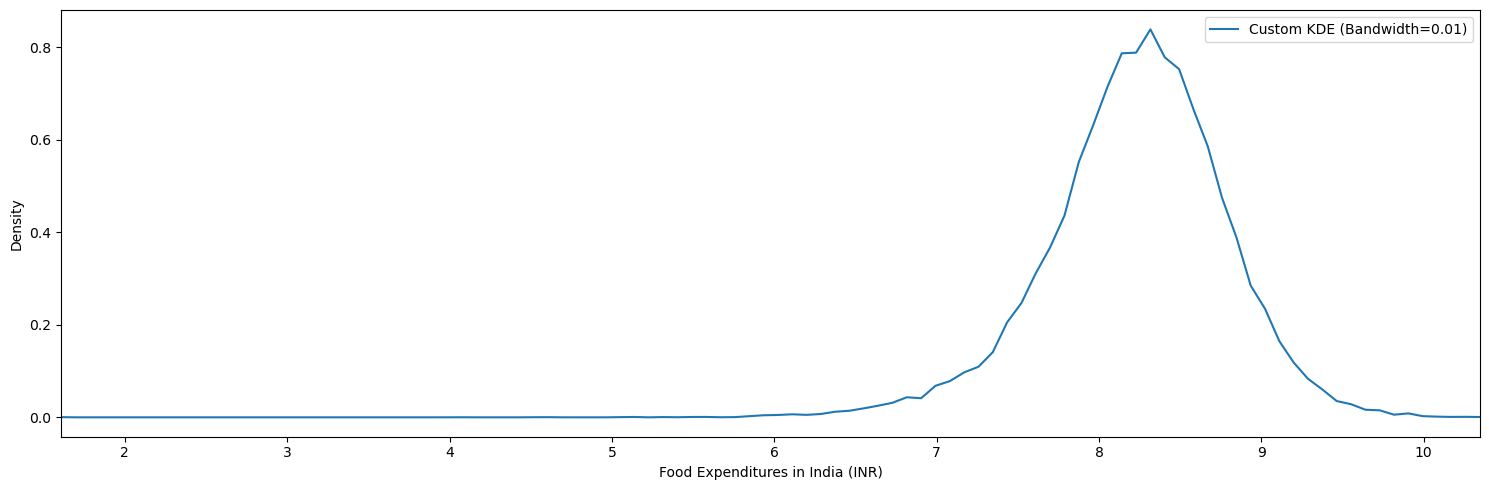

In [41]:
logS =np.log(S)

bandwidths = [.01]
fig, axes = plt.subplots(nrows=1,ncols=len(bandwidths), figsize=(15, 5), sharey=True)

for i, bandwidth in enumerate(bandwidths):
    kernel = kernel_estimator(logS, bandwidth)
    ax = axes[i] if len(bandwidths) > 1 else axes
    plot_pdf(logS, ax=ax, kernel_func=kernel, bandwidth=bandwidth)
    ax.set_ylabel('Density')
    ax.set_xlabel('Food Expenditures in India (INR)')


plt.tight_layout()
plt.show()